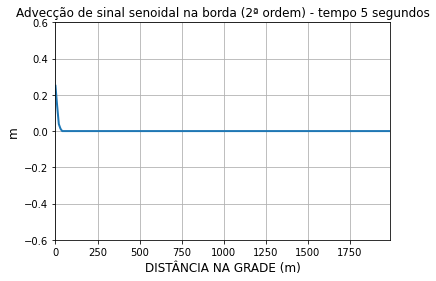

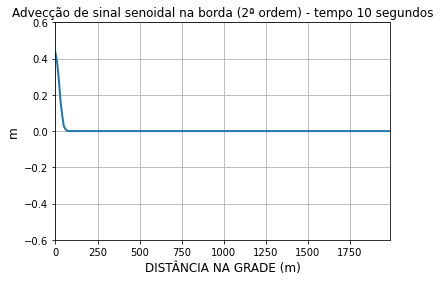

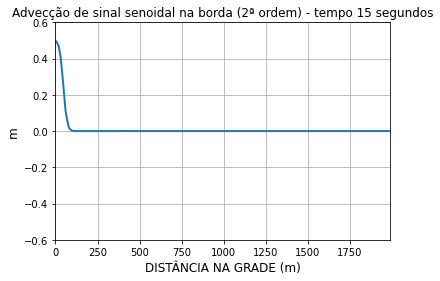

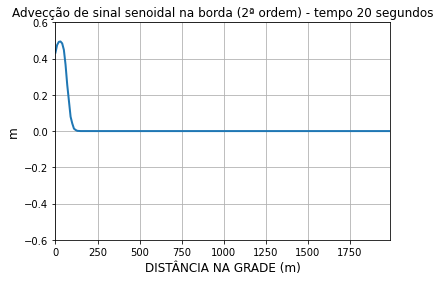

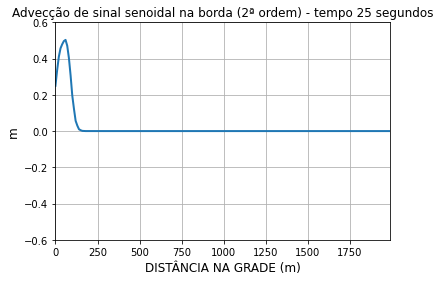

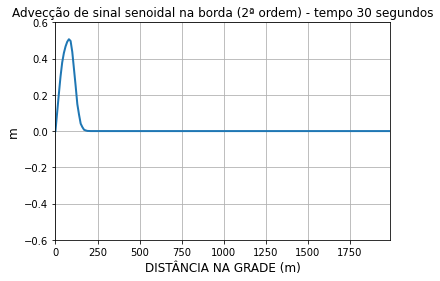

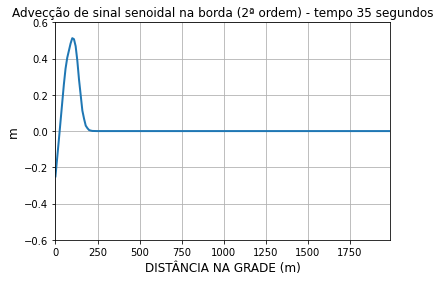

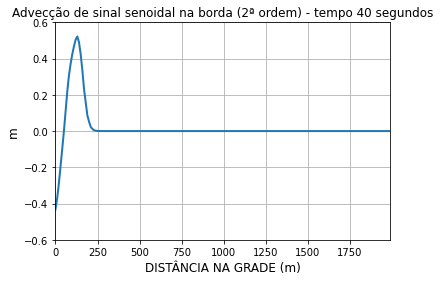

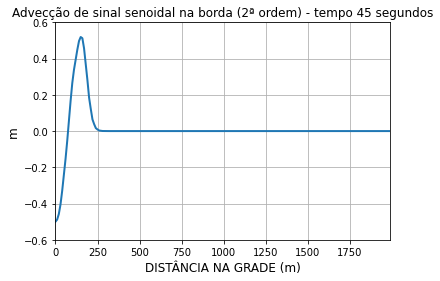

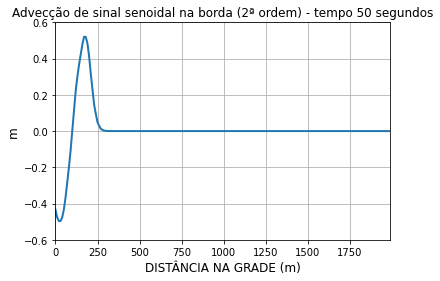

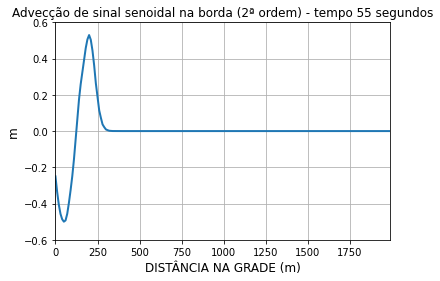

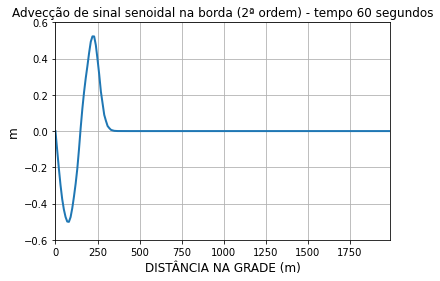

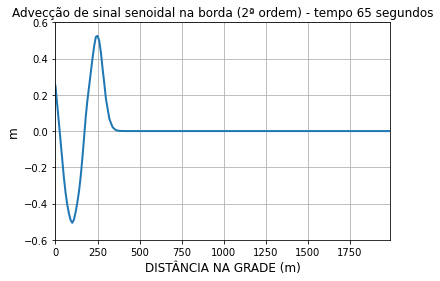

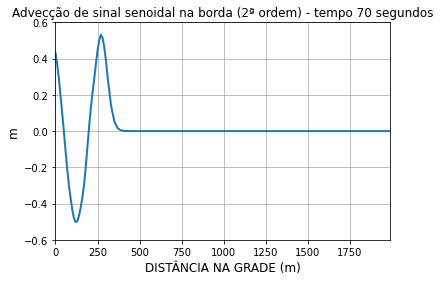

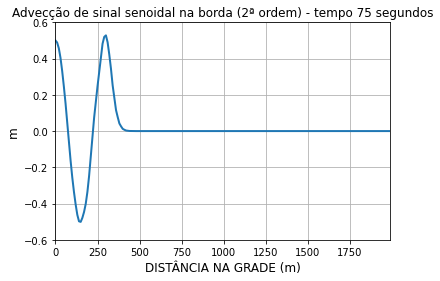

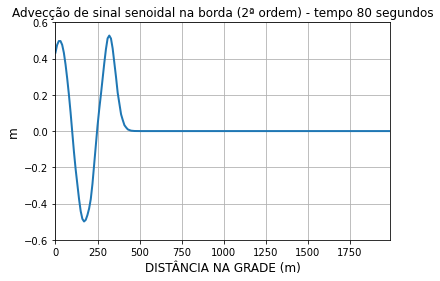

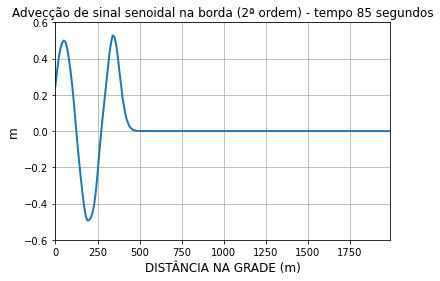

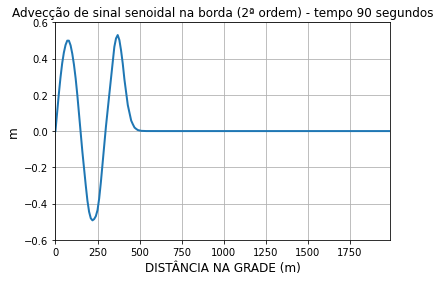

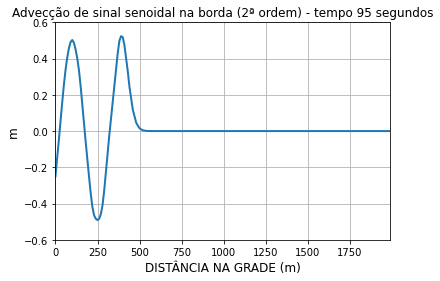

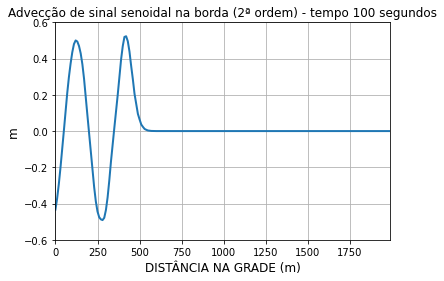

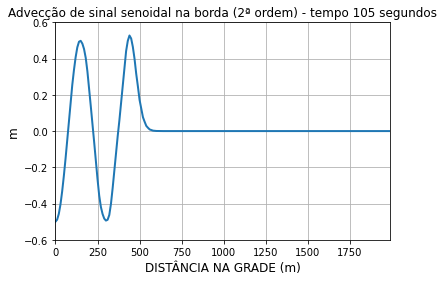

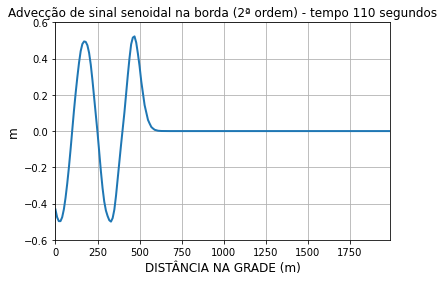

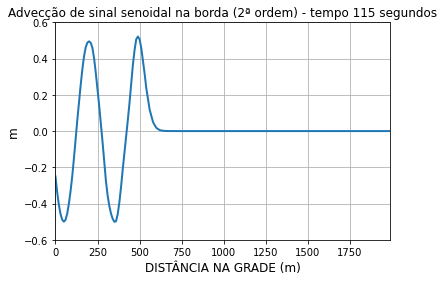

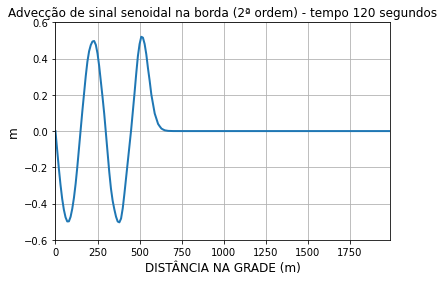

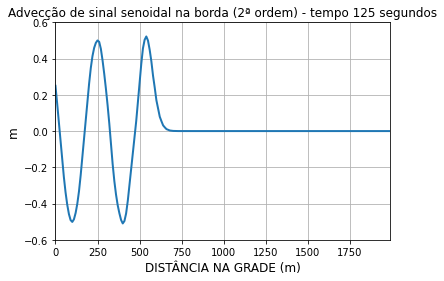

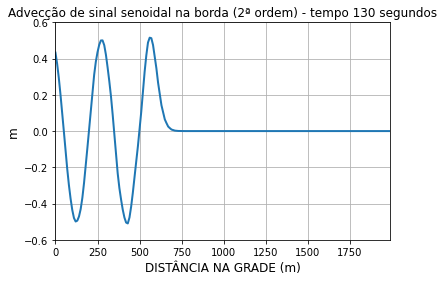

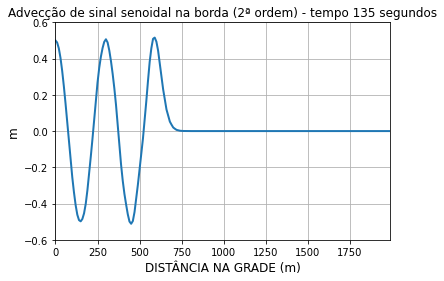

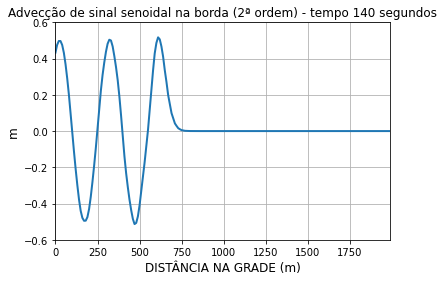

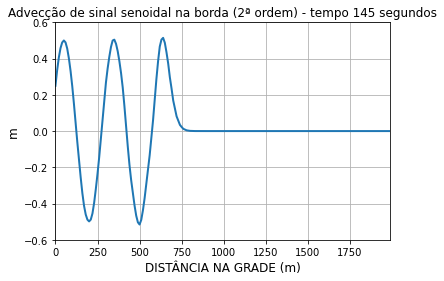

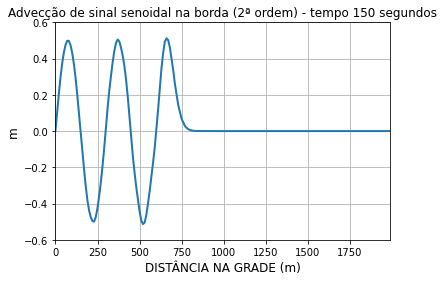

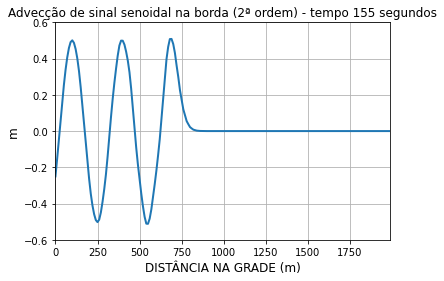

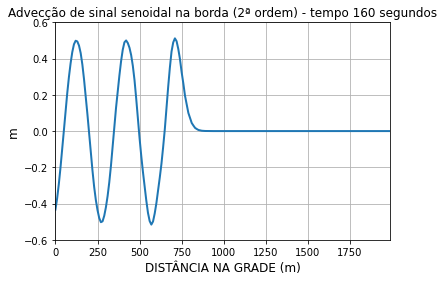

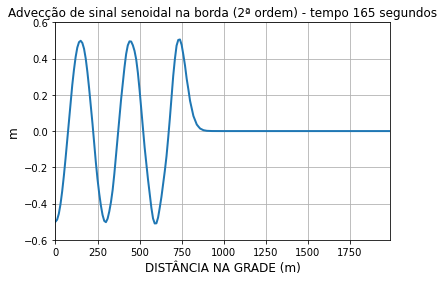

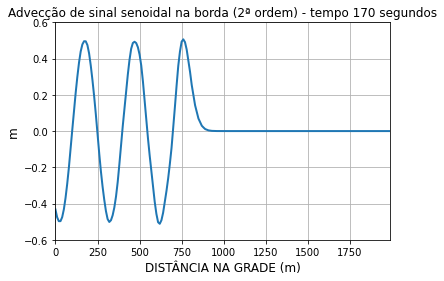

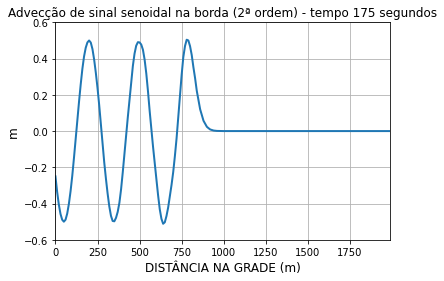

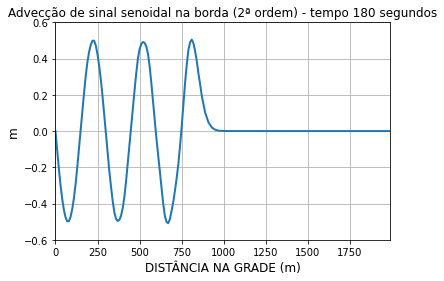

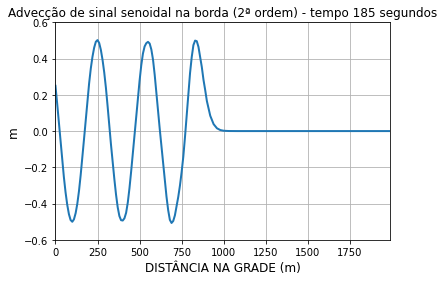

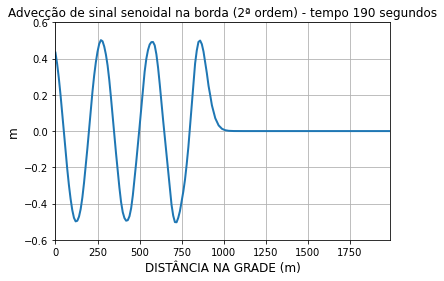

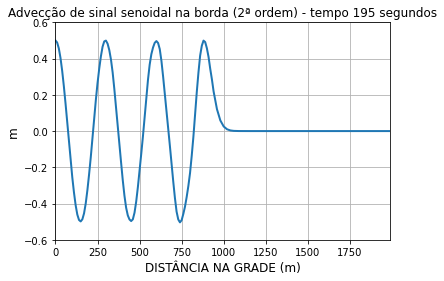

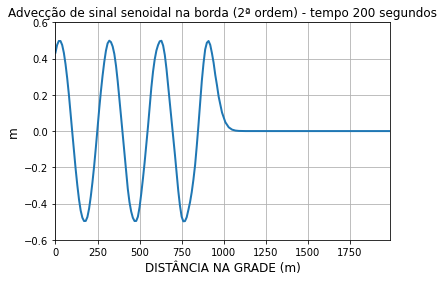

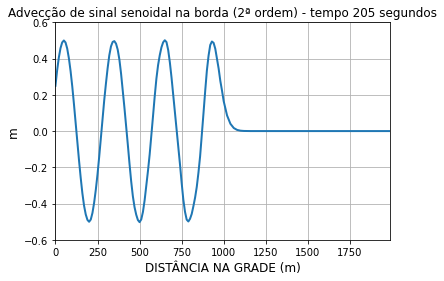

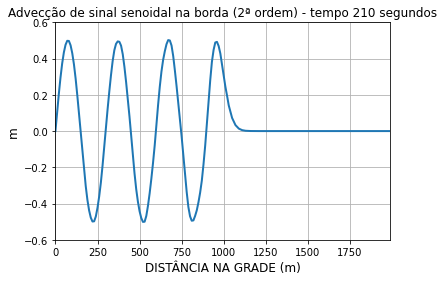

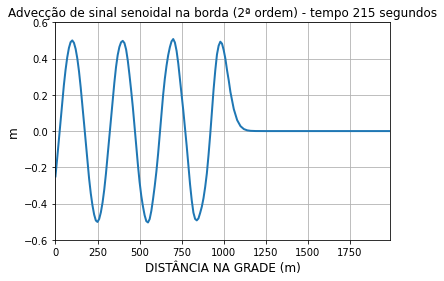

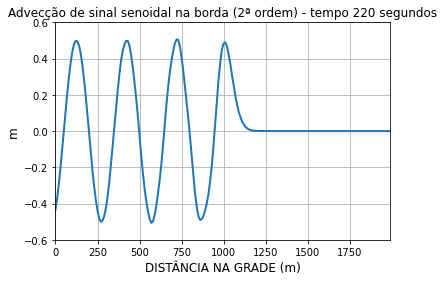

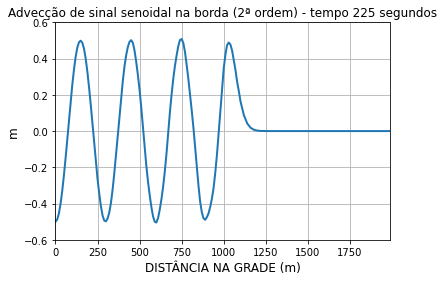

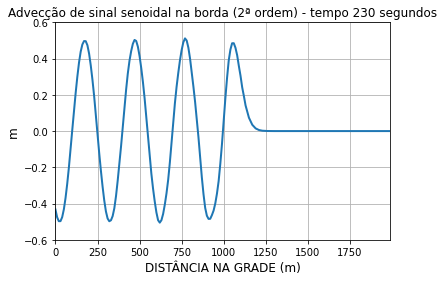

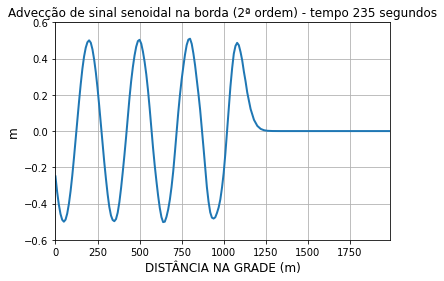

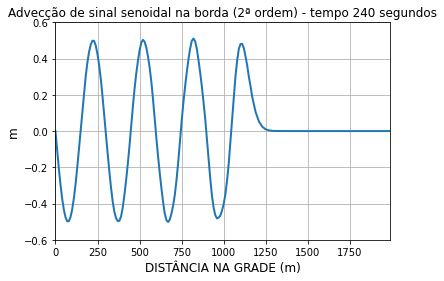

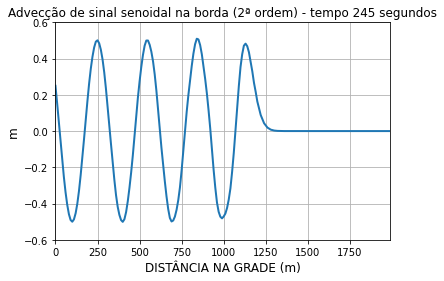

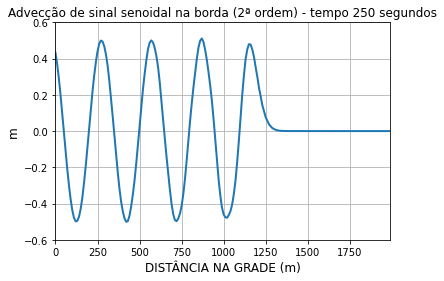

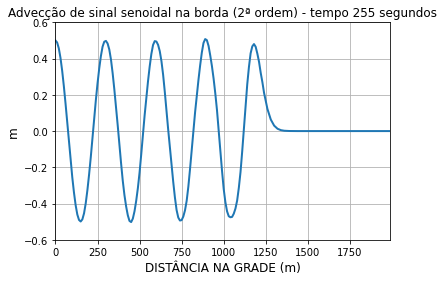

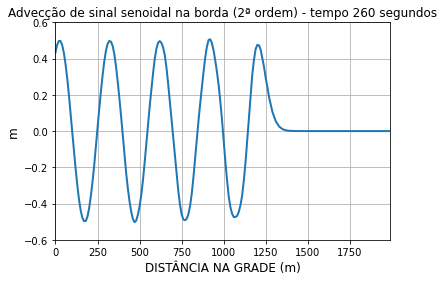

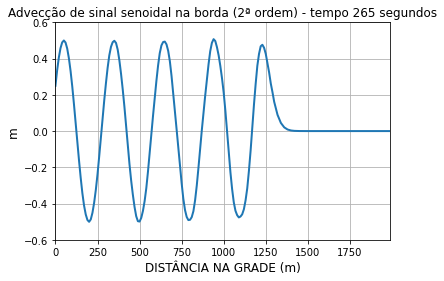

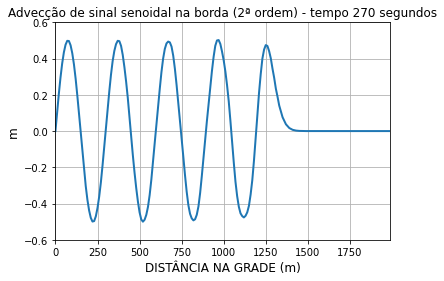

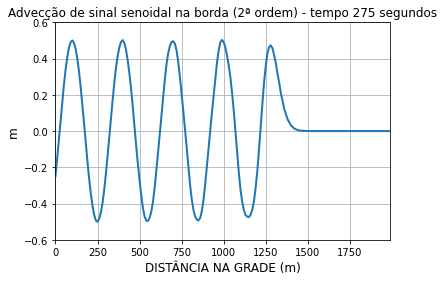

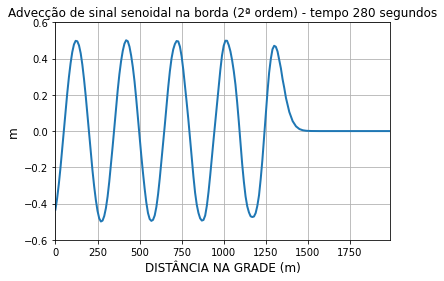

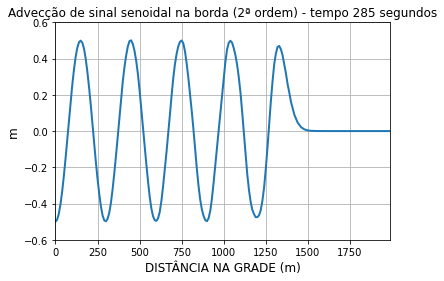

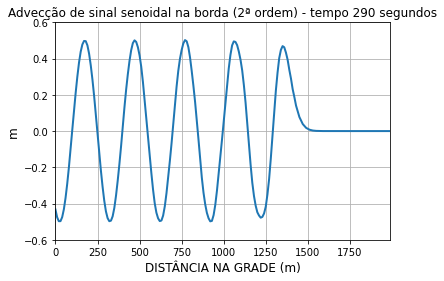

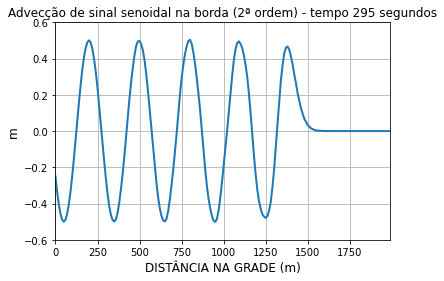

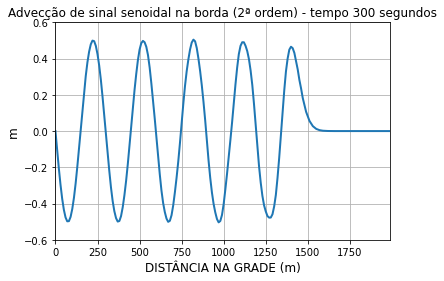

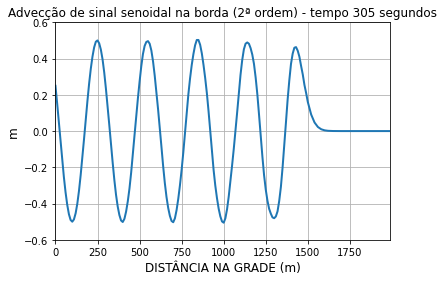

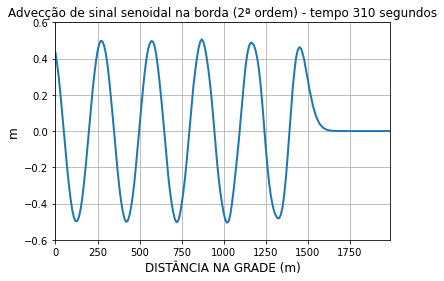

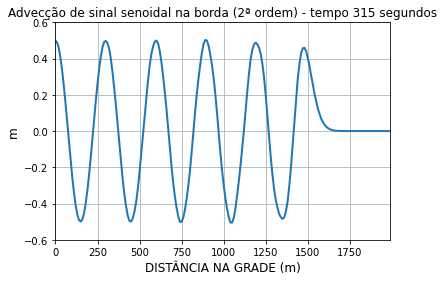

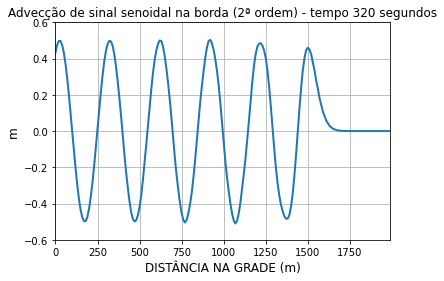

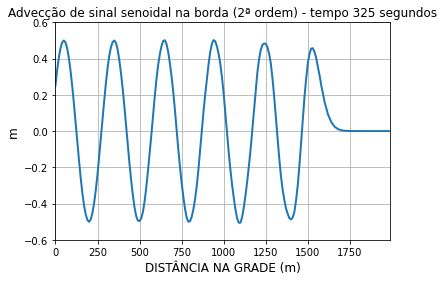

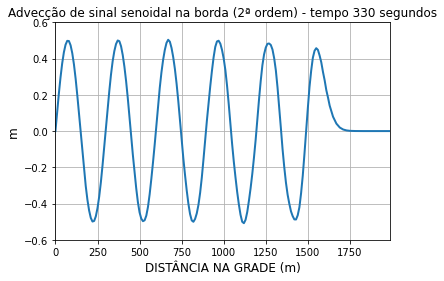

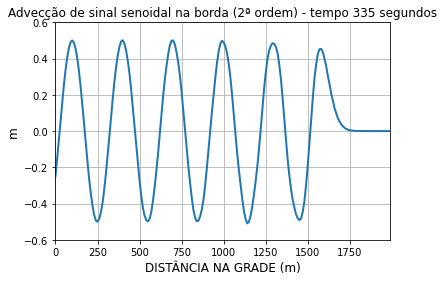

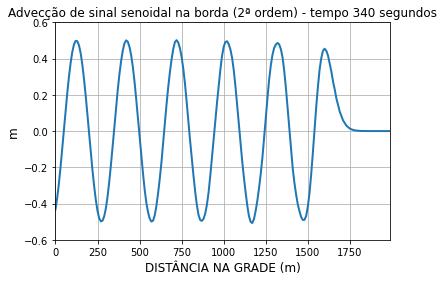

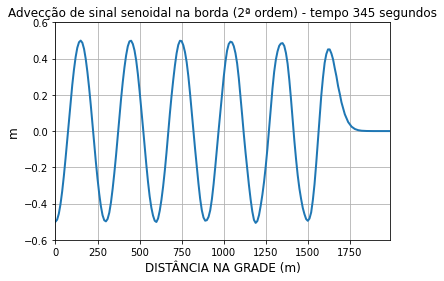

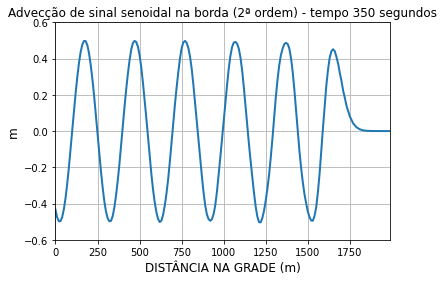

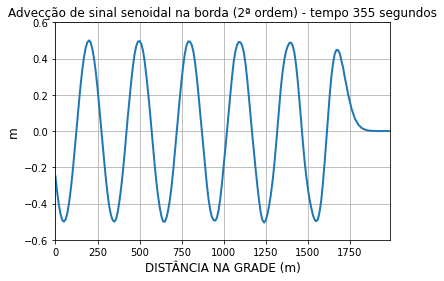

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# CONSTANTES DO MODELO
jmax = 200
nmax = 360
c = 5
dx = 10
dt = 1
amp = 0.5
per = 60
freqplo = 5

# CALCULOS INICIAIS
q = c * dt / dx
omega = 2 * np.pi / per

# CONDICOES INICIAIS
fant = np.zeros(jmax)
fatu = np.zeros(jmax)
fren = np.zeros(jmax)

# CONDICOES INICIAIS (NA BORDA)
fant[0] = amp * np.sin(omega * dt)
fatu[0] = amp * np.sin(omega * 2 * dt)

contplo = 2
amp2 = amp * 1.2
xgrid = np.arange(jmax) * dx

# LOOP NO TEMPO
for n in range(3, nmax):
    tempo = n * dt
    
    # IMPOSICAO DE CONDICOES DE CONTORNO
    fren[0] = amp * np.sin(omega * tempo)
    
    # FORMULA DE RECORRENCIA
    fren[1:jmax-1] = fant[1:jmax-1] - q * (fatu[2:jmax] - fatu[0:jmax-2])
    
    contplo += 1
    if contplo == freqplo:
        contplo = 0
        # APRESENTACAO DE RESULTADOS
        plt.plot(xgrid, fren, linewidth=2)
        plt.axis([xgrid[0], xgrid[-1], -amp2, amp2])
        plt.title(f'Advecção de sinal senoidal na borda (2ª ordem) - tempo {tempo} segundos', fontsize=12)
        plt.xlabel('DISTÂNCIA NA GRADE (m)', fontsize=12)
        plt.ylabel('m', fontsize=12)
        plt.grid(True)
        plt.pause(0.5)
        plt.clf()  # Limpar a figura após a plotagem
    
    # TRANSFERENCIA DE VARIAVEIS NO TEMPO
    fant = fatu.copy()
    fatu = fren.copy()

plt.show()